In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.random import randn as dW

# MEASURING THE EXCESS OF ASSETS OVER LIABILITIES

The surplus accumulates a stochastic process
of surplus contributions C and capital gains from investment in a Black-Scholes market. From the
surplus is withdrawn redistributions to the policy holders in terms of dividends. We modelled the
process of dividends similarly to the underlying payment process B (and the process of surplus
contributions C). In (22) a deterministic differential equation for the reserve was presented where
the coefficients in the dividend process are linked to the surplus. We concluded Section 3 by
proposing dividends to be affine in the surplus. This led to a reserve that is affine in the surplus.
Thus, Section 3 dealt with valuation of certain dividend plans. The question that we did not
address was whether, or rather when, surplus linked dividends, or dividends affine in the surplus
for that matter, are particularly attractive. Questions of that kind appear in the discipline of
optimization rather than valuation.

We approximate the surplus by a diffusion process on the basis of the following list of adaptations:

• We assume that the surplus is invested in the riskfree asset exclusively.

• We approximate the process of surplus contributions by a Brownian motion with volatility
ρ and drift c.

• We assume that accumulated dividends are absolutely continuous and paid out by the rate
δ.

These adaptations give us the following surplus dynamics,

$$dX (t) = rX^{rf}_t dt + d (C − D)(t)$$
$$\textbf{X} (0) = <x^{rf}_0,x^a_0>$$
$$where$$
$$dC (t) = c (t)X_adt + ρ (t) dW (t)$$
$$dD (t) = δ (t) dt$$

$$(r:risk free,c(t) : drift\,rate,\rho(t)=desv.est.,\delta: dividendos,dt)$$

In [0]:
params = (.05,.1,0,0,1)

$$dD (t) = δ (t) dt$$


$$(dX_t,d (C − D)_t)$$

In [0]:
init = np.array([5,5,5])
t = np.arange(1, 50, 1)

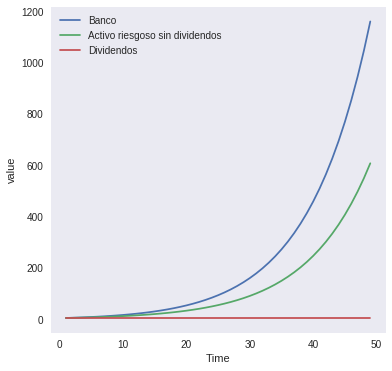

In [0]:
system = lambda x,t,r,c,rho,d,dt: np.array([r*x[0]+ c*x[1]  - d,c*x[1] + rho*dW()/100,d])

res = odeint(system,init,t,args=params)
x,y,z=res.T
plt.figure(figsize=(6,6))
plt.plot(t, x, label='Banco')
plt.plot(t, y, label='Activo riesgoso sin dividendos')
plt.plot(t, z, label='Dividendos')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('value')
plt.grid()
plt.show()

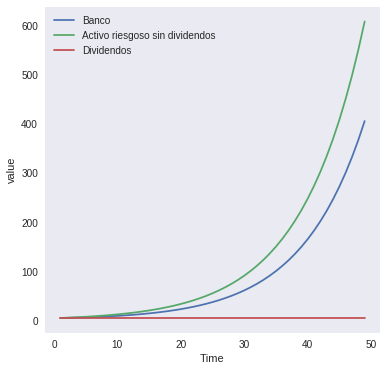

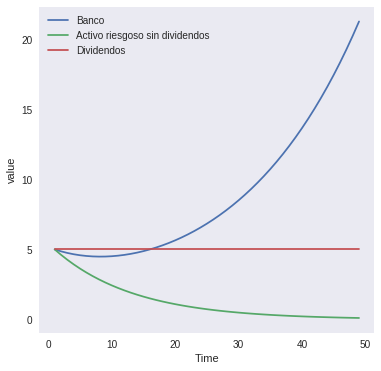

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


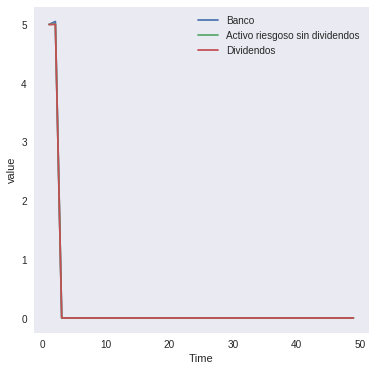

In [0]:
init = np.array([5,5,5])
params = (.05,.1,0,0,1)

inits=(np.array([5,5,5]),np.array([5,5,5]),np.array([5,5,5]))
params=((-.05,.1,0,0,1),(.05,-.08,0,0,1),(.45,.1,1,0,1))
for i,p in zip(inits,params):
    res = odeint(system,i,t,args=p)
    x,y,z=res.T
    plt.figure(figsize=(6,6))
    plt.plot(t, x, label='Banco')
    plt.plot(t, y, label='Activo riesgoso sin dividendos')
    plt.plot(t, z, label='Dividendos')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('value')
    plt.grid()
    plt.show()

# Conclusion

The ODE methos fails to solve for a stochastic equation, it can be seen on the last graph that changing the deviation to anything other than 0 yields no cogent results. During periods of high inflation investing on risky assets that yield no more that the current rate of risk free is not a feasible investment. Dividends that do not increase over time become less significant over time.

Bibliography:

http://web.math.ku.dk/~mogens/DSLPr.pdf